## Class Predictions with Keras ##
This notebook shows how to train a feed-forward neural network to predict classifications for the numbers from the sklearn Digits Data-Set.  More information about the data-set can be found here:  
http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits 
  
The digits are images of handwritten numbers, each 8 x 8 pixels (i.e. 64 data-points) that look like the following sample for numbers 0,1,2,3: 
  
  
<img style="float: left;" src="./digits_sample.png">
   
    
This notebook trains a Keras classifier to predict whether the image is a number from 0 to 9.  
  

In [114]:
#pip install keras
#pip install tensorflow
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

### 1. Load and Explore the Data-Set ###

In [115]:
from sklearn.datasets import load_digits
digits = load_digits()
print(type(digits))
print(type(digits.data))

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>


#### View the Data Set ####
We have 1797 rows of 64 features in `digits.data` and a list of 1797 items in `digits.target`

In [116]:
print("digits.data Shape", digits.data.shape)
print("digits.target Shape",digits.target.shape)
print("\nFirst three items in digits.data:")
print(digits.data[0:3])
print("\nFirst three items in digits.target:")
print(digits.target[0:3])


digits.data Shape (1797, 64)
digits.target Shape (1797,)

First three items in digits.data:
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]]

First three items in digits.target:
[0 1 2]


Type: <class 'numpy.ndarray'>
Shape: (64,)
Reshaped: (8, 8)

 The target class for this image is: 4


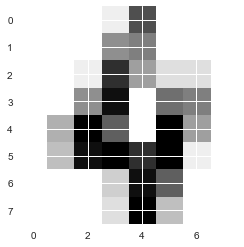

In [117]:
#### Visualise a random sample ####
import matplotlib.pyplot as plt
img = digits.data[4]
print("Type:",type(img))
print("Shape:",img.shape)
#2D image has been flattened into 64 x 1 array.  reshape to 8x8 to visualise it
img = img.reshape((8,8))
print("Reshaped:",img.shape)
plt.imshow(img, interpolation = 'nearest', cmap=plt.cm.binary)
print("\n The target class for this image is:", digits.target[4])

#### Scale the Data-Set ####

In [118]:
scalar = MinMaxScaler()
scalar.fit(digits.data)
X = scalar.transform(digits.data)

#### Split into Training and Test Set ####
Split the data 80 : 20

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, digits.target, test_size=0.20, random_state=42)

### 3. Build and Train a Model ###


** One Hot Encoding **  
We need to change the classifier 0-9 to a 10 field binary 1/0 - classic ML approach is to use one-hot encoding:  
0 = 0,0,0,0,0,0,0,0,0,0  
1 = 0,1,0,0,0,0,0,0,0,0  
2 = 0,0,1,0,0,0,0,0,0,0  
etc...
  
There is a an example on how to do this with the `sklearn` `MultiLabelBinarizer` here:
    https://chrisalbon.com/machine_learning/preprocessing_structured_data/one-hot_encode_features_with_multiple_labels/  
    


In [120]:
# restructure the "y" target variables to a list of lists
ylist = y_train.tolist()
ylistlist = []
for i in ylist:
    ylistlist.append([i])

In [121]:
ylistlist[:5]

[[6], [0], [0], [3], [0]]

In [122]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit_transform(ylistlist)
one_hot_target = mlb.fit_transform(ylistlist)

This returns the one-hot-encoded labels in a Numpy Array

In [123]:
print(type(one_hot_target))
print(one_hot_target.shape)

<class 'numpy.ndarray'>
(1437, 10)


In [124]:
for i in range(0,4):
    print("Target", y_train[i], "Encoded:", one_hot_target[i])

Target 6 Encoded: [0 0 0 0 0 0 1 0 0 0]
Target 0 Encoded: [1 0 0 0 0 0 0 0 0 0]
Target 0 Encoded: [1 0 0 0 0 0 0 0 0 0]
Target 3 Encoded: [0 0 0 1 0 0 0 0 0 0]


The sklearn Multi-Label Binarizer conveniently keeps track of the class labels for us:

In [125]:
mlb.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [126]:
X_train.shape

(1437, 64)

#### Build the Keras model ####

In [127]:
model = Sequential()
model.add(Dense(64, input_dim=64, activation='relu'))  #work with flat 64-D data, activation type "Rectified Linear Unit"
model.add(Dense(1024, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [128]:
# Fit the model
hist = model.fit(X_train, one_hot_target, epochs=100, verbose=0)  # epoc iterations
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 1024)              66560     
_________________________________________________________________
dense_30 (Dense)             (None, 32)                32800     
_________________________________________________________________
dense_31 (Dense)             (None, 10)                330       
Total params: 103,850
Trainable params: 103,850
Non-trainable params: 0
_________________________________________________________________


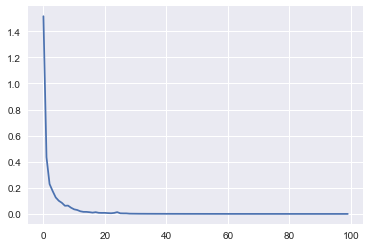

In [129]:
plt.plot(hist.history['loss'])
plt.show()


#### Use the Model to Make Predictions ####

In [130]:
print(X_test.shape)
print(y_test.shape)

(360, 64)
(360,)


In [131]:
#Use Keras Predict_Classes to predict the actual class
test_predict = model.predict_classes(X_test)

#### Get Accuracy Score and Print Confusion Matrix ####

In [132]:
import numpy as np

In [134]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test, test_predict).round(3)*100, "percent")

Accuracy Score: 98.1 percent


In [136]:
#y_test

[Text(84.4,0.5,'Predicted Label')]

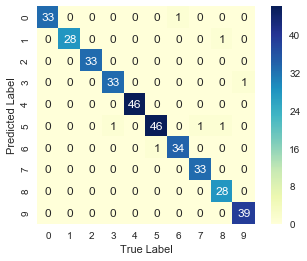

In [137]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

m = confusion_matrix(y_test, test_predict)

ax = sns.heatmap(m.T, square=True, annot=True, fmt='d', cmap="YlGnBu", cbar=True
            , xticklabels=[0,1,2,3,4,5,6,7,8,9]
            , yticklabels=[0,1,2,3,4,5,6,7,8,9])

ax.set(xlabel='True Label')
ax.set(ylabel='Predicted Label')

Text(0.5,1,'Confusion Matrix - Prediction Percentage Hits')

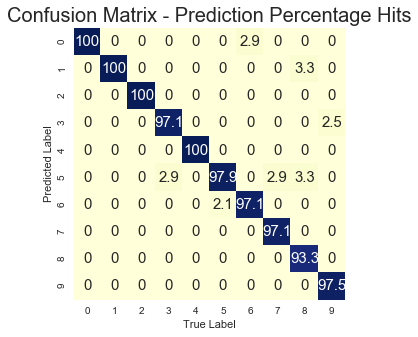

In [144]:
import numpy as np
mperc = np.true_divide(m, m.sum(axis=1, keepdims=True))
mperc = np.round(mperc,3) * 100

plt.figure(figsize=(16,5))

ax = sns.heatmap(mperc.T, square=True, annot=True, cmap="YlGnBu", cbar=False, fmt='g'
            , xticklabels=[0,1,2,3,4,5,6,7,8,9]
            , yticklabels=[0,1,2,3,4,5,6,7,8,9]
                ,annot_kws={"size": 15})

ax.set(xlabel='True Label')
ax.set(ylabel='Predicted Label')
ax.set_title("Confusion Matrix - Prediction Percentage Hits", fontsize=20)